### Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("baltimorecrimedata.csv", low_memory=False)
df.head(10)

X          Y  RowID  CCNumber           CrimeDateTime CrimeCode   
0 -76.619805  39.294005      1  13C06813  2013/03/15 16:40:00+00        4E  \
1   0.000000   0.000000      2  13C06684  2013/03/15 13:45:00+00        4E   
2 -76.577644  39.293972      3  13C07457  2013/03/15 19:00:00+00        5A   
3 -76.679570  39.343770      4  13C08037  2013/03/15 16:00:00+00        6G   
4 -76.606256  39.322563      5  13C06658  2013/03/15 14:20:00+00        4E   
5 -76.663450  39.345117      6  13C06435  2013/03/15 01:00:00+00        4E   
6 -76.684084  39.331333      7  13C06934  2013/03/15 23:54:00+00        4E   
7 -76.584146  39.350314      8  13C06897  2013/03/15 22:25:00+00        4E   
8 -76.576883  39.279781      9  13C07192  2013/03/15 18:30:00+00        6D   
9 -76.666689  39.295530     10  13D09445  2013/03/15 14:00:00+00        5A   

         Description Inside_Outside Weapon Post  ... Ethnicity   
0     COMMON ASSAULT              I    NaN  114  ...       NaN  \
1     COMMON ASSAULT              O    NaN  NaN  ...       NaN   
2           BURGLARY              I    NaN  222  ...       NaN   
3            LARCENY              I    NaN  613  ...       NaN   
4     COMMON ASSAULT              I    NaN  513  ...       NaN   
5     COMMON ASSAULT              I    NaN  532  ...       NaN   
6     COMMON ASSAULT              I    NaN  621  ...       NaN   
7     COMMON ASSAULT              I    NaN  415  ...       NaN   
8  LARCENY FROM AUTO              O    NaN  214  ...       NaN   
9           BURGLARY              I    NaN  814  ...       NaN   

              Location Old_District New_District                 Neighborhood   
0      400 N HOWARD ST      CENTRAL          NaN                     DOWNTOWN  \
1                  NaN          NaN          NaN                          NaN   
2    100 N KENWOOD AVE    SOUTHEAST          NaN  PATTERSON PARK NEIGHBORHOOD   
3  3800 W GARRISON AVE    NORTHWEST          NaN              LANGSTON HUGHES   
4  800 EXETER HALL AVE     NORTHERN          NaN               BETTER WAVERLY   
5    2800 VIRGINIA AVE     NORTHERN          NaN                      CYLBURN   
6   3900 BARRINGTON RD    NORTHWEST          NaN                   DORCHESTER   
7    1700 HARTSDALE RD    NORTHEAST          NaN                 PERRING LOCH   
8   1100 S KENWOOD AVE    SOUTHEAST          NaN                       CANTON   
9    700 N LONGWOOD ST    SOUTHWEST          NaN            FRANKLINTOWN ROAD   

    Latitude  Longitude             GeoLocation           PremiseType   
0  39.294005 -76.619805  (39.294005,-76.619805)  LIGHT RAIL            \
1   0.000000   0.000000                   (0,0)                  PARK   
2  39.293972 -76.577644  (39.293972,-76.577644)     ROW/TOWNHOUSE-VAC   
3  39.343770 -76.679570    (39.34377,-76.67957)  OTHER - INSIDE         
4  39.322563 -76.606256  (39.322563,-76.606256)  APT/CONDO - OCCUPIED   
5  39.345117 -76.663450   (39.345117,-76.66345)     ROW/TOWNHOUSE-OCC   
6  39.331333 -76.684084  (39.331333,-76.684084)     ROW/TOWNHOUSE-OCC   
7  39.350314 -76.584146  (39.350314,-76.584146)     ROW/TOWNHOUSE-OCC   
8  39.279781 -76.576883  (39.279781,-76.576883)  PARKING LOT-OUTSIDE    
9  39.295530 -76.666689   (39.29553,-76.666689)     ROW/TOWNHOUSE-OCC   

   Total_Incidents  
0                1  
1                1  
2                1  
3                1  
4                1  
5                1  
6                1  
7                1  
8                1  
9                1  

[10 rows x 23 columns]

In [4]:
df.shape

(584987, 23)

In [5]:
columns = df.columns.tolist()
columns

['X',
 'Y',
 'RowID',
 'CCNumber',
 'CrimeDateTime',
 'CrimeCode',
 'Description',
 'Inside_Outside',
 'Weapon',
 'Post',
 'Gender',
 'Age',
 'Race',
 'Ethnicity',
 'Location',
 'Old_District',
 'New_District',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'GeoLocation',
 'PremiseType',
 'Total_Incidents']

In [6]:
df.isna().sum()

X                     934
Y                     934
RowID                   0
CCNumber              300
CrimeDateTime           0
CrimeCode               0
Description             0
Inside_Outside     133508
Weapon             440702
Post                 8721
Gender              94016
Age                113992
Race                18851
Ethnicity          526206
Location             3181
Old_District        19684
New_District       573942
Neighborhood         8902
Latitude              934
Longitude             934
GeoLocation             0
PremiseType        133844
Total_Incidents         0
dtype: int64

# 2. Data Cleaning

As it is visible that, there are 1,80,952 cells are null in the weapons column. Which is around 65% rows of the whole data.
Dropping this rows can lead to loss of much significant data, which can reduce the quality of the dataset.

To deal with this null values, we can look at some other attributes, which can be related to this attribute. Like, Crime type can help to determine which type of weapon is used in a perticular crime.

In [7]:
# Find the list of crime types in which there are null entries in the weapon column
crime_with_no_weapon = set()
for idx in df.index:
    if pd.isna(df['Weapon'][idx]):
        crime_with_no_weapon.add(df['Description'][idx])
crime_with_no_weapon

{'AGG. ASSAULT',
 'ARSON',
 'AUTO THEFT',
 'BURGLARY',
 'COMMON ASSAULT',
 'LARCENY',
 'LARCENY FROM AUTO',
 'RAPE',
 'ROBBERY',
 'ROBBERY - CARJACKING',
 'ROBBERY - COMMERCIAL'}

## Crime type details:

* **Arson:** the criminal act of deliberately setting fire to property.
* **Assault by threat:** a threat or attempt to inflict offensive physical contact or bodily harm on a person that puts the person in immediate danger of or in apprehension
* **Auto theft:** the criminal act of stealing or attempting to steal a motor vehicle
* **Burglary:** llegal entry of a building with intent to commit a crime, especially theft.
* **Larceny:** theft of personal property
* **Rape:** to force someone to have sex when they are unwilling, using violence or threatening behaviour
* **Robbery:** the action of taking property unlawfully from a person or place by force or threat of force

As it visible that where weapon values are not available, the associated crime types are mostly robbery, theft, arson, larceny, etc. In these types of crime most of the time there are not any weapon involved in crime.

So, the blank cells in weapon cells doesn't indicate that the data is missing, but we can conclude that there could no weapons involved in the crime at the first place.

So, we can fill all this blank cells with the "No weapon" value.

In [8]:
# fill blank cells in weapon column with "No weapon" value
df['Weapon'].fillna("NO WEAPON", inplace = True)

In [9]:
df['Total_Incidents'].value_counts()

Total_Incidents
1    584987
Name: count, dtype: int64

In the 'Total Incident' columns all the entries are filled with value 1. Which does not provide any value to the dataset. So, there is no loss in dataset quality in dropping this columns.

After this, the 'Location 1' columns contains the tuple of (Longitude, Latitude) as values. There are also separate columns for Longitude and Latitude as well. So, dropping the Location 1 column also does not affect the dataset quality.

In [10]:
# dropping Total Incident column
df.drop(['Total_Incidents'], axis=1, inplace=True)
df.head()

X          Y  RowID  CCNumber           CrimeDateTime CrimeCode   
0 -76.619805  39.294005      1  13C06813  2013/03/15 16:40:00+00        4E  \
1   0.000000   0.000000      2  13C06684  2013/03/15 13:45:00+00        4E   
2 -76.577644  39.293972      3  13C07457  2013/03/15 19:00:00+00        5A   
3 -76.679570  39.343770      4  13C08037  2013/03/15 16:00:00+00        6G   
4 -76.606256  39.322563      5  13C06658  2013/03/15 14:20:00+00        4E   

      Description Inside_Outside     Weapon Post  ...   
0  COMMON ASSAULT              I  NO WEAPON  114  ...  \
1  COMMON ASSAULT              O  NO WEAPON  NaN  ...   
2        BURGLARY              I  NO WEAPON  222  ...   
3         LARCENY              I  NO WEAPON  613  ...   
4  COMMON ASSAULT              I  NO WEAPON  513  ...   

                        Race  Ethnicity             Location Old_District   
0  BLACK_OR_AFRICAN_AMERICAN        NaN      400 N HOWARD ST      CENTRAL  \
1  BLACK_OR_AFRICAN_AMERICAN        NaN                  NaN          NaN   
2                    UNKNOWN        NaN    100 N KENWOOD AVE    SOUTHEAST   
3                      WHITE        NaN  3800 W GARRISON AVE    NORTHWEST   
4  BLACK_OR_AFRICAN_AMERICAN        NaN  800 EXETER HALL AVE     NORTHERN   

  New_District                 Neighborhood   Latitude  Longitude   
0          NaN                     DOWNTOWN  39.294005 -76.619805  \
1          NaN                          NaN   0.000000   0.000000   
2          NaN  PATTERSON PARK NEIGHBORHOOD  39.293972 -76.577644   
3          NaN              LANGSTON HUGHES  39.343770 -76.679570   
4          NaN               BETTER WAVERLY  39.322563 -76.606256   

              GeoLocation           PremiseType  
0  (39.294005,-76.619805)  LIGHT RAIL            
1                   (0,0)                  PARK  
2  (39.293972,-76.577644)     ROW/TOWNHOUSE-VAC  
3    (39.34377,-76.67957)  OTHER - INSIDE        
4  (39.322563,-76.606256)  APT/CONDO - OCCUPIED  

[5 rows x 22 columns]

In [11]:

df['Inside_Outside'].value_counts()

Inside_Outside
I          217487
O          213170
Outside     13346
Inside       7476
Name: count, dtype: int64

Here, 'I' indicates Inside and 'O' indicates outside. There are also few entries in which Outside is written insted of O, and Inside is written insted of I. So, we should change those values with O and I respectively to maintain data integrity.

In [12]:
df.loc[df['Inside_Outside'] == "Outside", 'Inside_Outside'] = 'O'
df.loc[df['Inside_Outside'] == "Inside", 'Inside_Outside'] = 'I'
df['Inside_Outside'].value_counts()

Inside_Outside
O    226516
I    224963
Name: count, dtype: int64

In [13]:
# After all this, if there are still some entries with null or none values drop them
df.dropna(inplace = True)

In [14]:
df.isna().sum(), df.shape

(X                 0.0
 Y                 0.0
 RowID             0.0
 CCNumber          0.0
 CrimeDateTime     0.0
 CrimeCode         0.0
 Description       0.0
 Inside_Outside    0.0
 Weapon            0.0
 Post              0.0
 Gender            0.0
 Age               0.0
 Race              0.0
 Ethnicity         0.0
 Location          0.0
 Old_District      0.0
 New_District      0.0
 Neighborhood      0.0
 Latitude          0.0
 Longitude         0.0
 GeoLocation       0.0
 PremiseType       0.0
 dtype: float64,
 (0, 22))

We would now save our cleaned data frame into cleaned.csv file

In [15]:
# df.to_csv("cleaned.csv")

In [16]:
cleaned_df = pd.read_csv("cleaned.csv")

# 3. Data Visualization

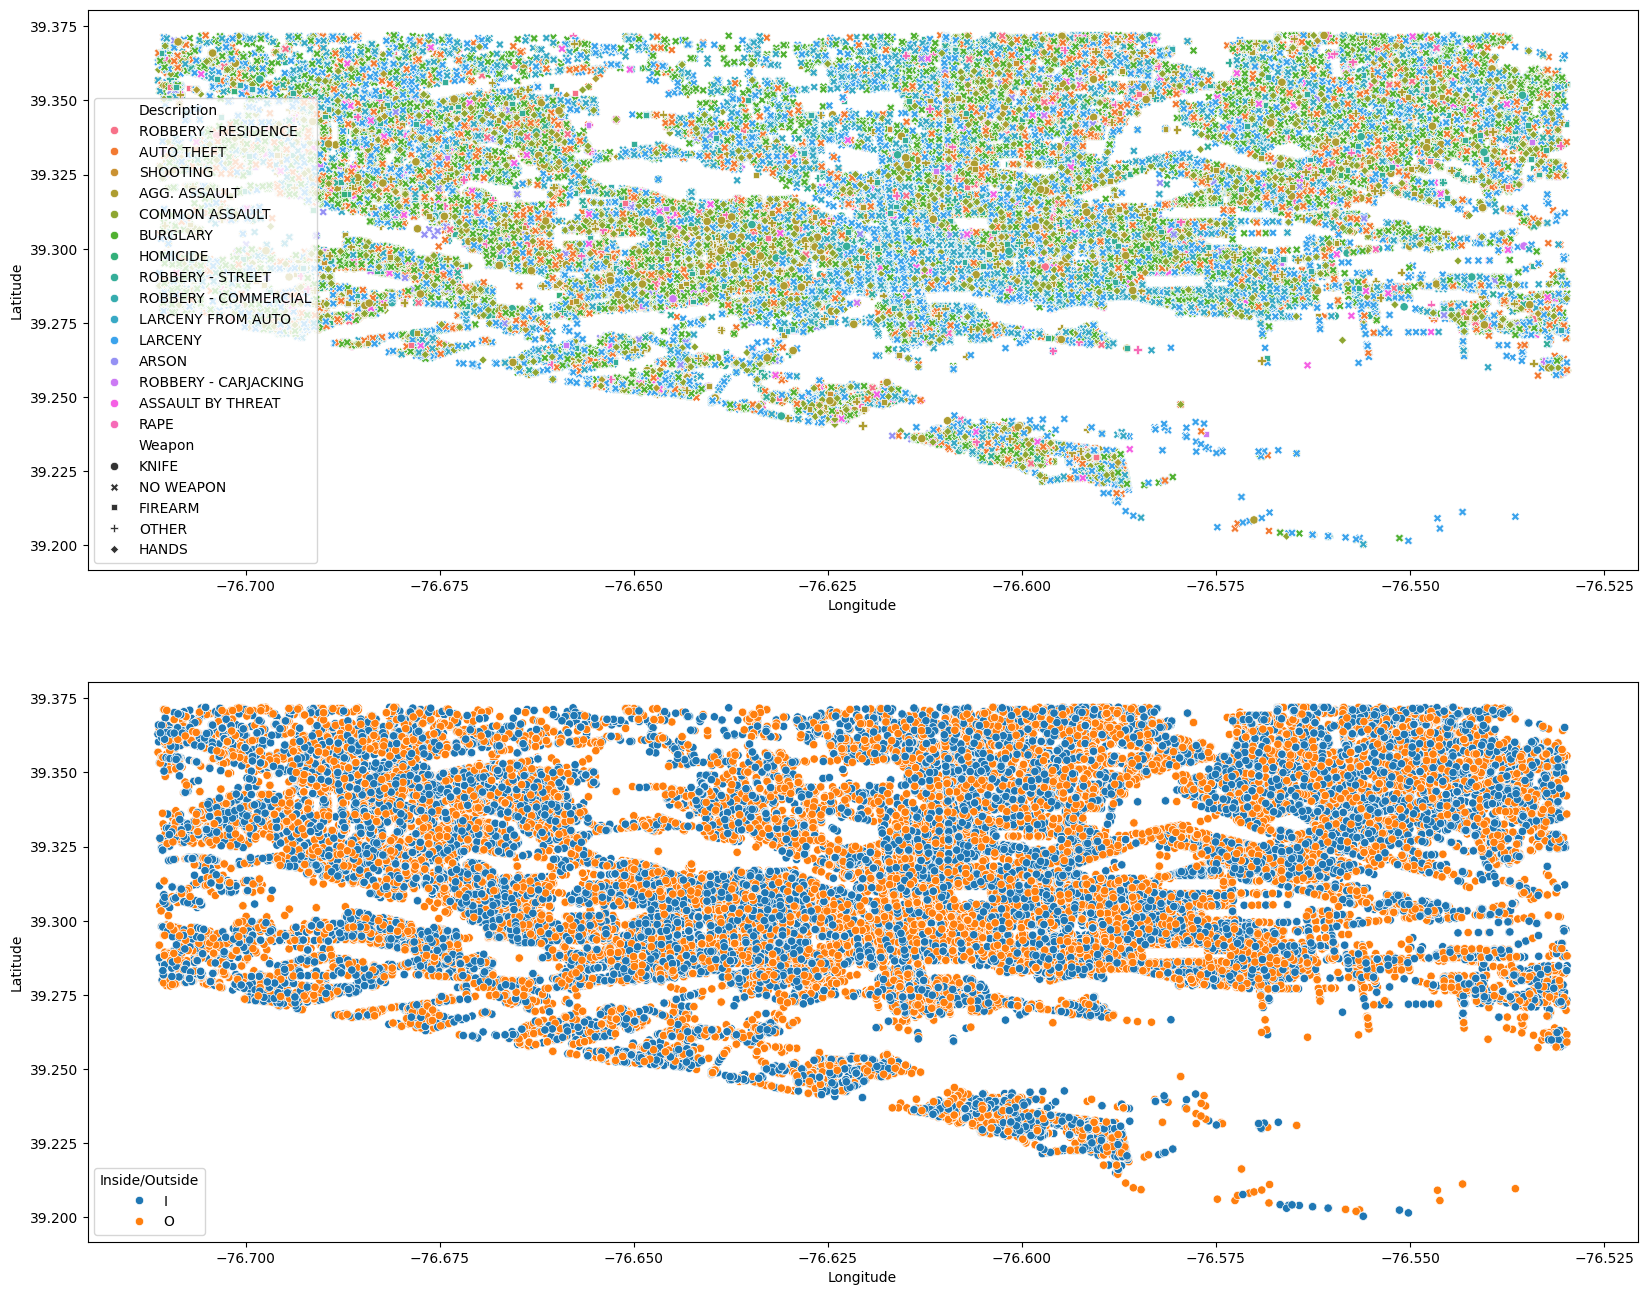

In [17]:
fig, ax = plt.subplots(2,1, figsize=(20,16))
sns.scatterplot(y=cleaned_df['Latitude'], x = cleaned_df['Longitude'], hue = cleaned_df['Description'], style=cleaned_df['Weapon'], ax = ax[0])
# sns.scatterplot(y=cleaned_df['Latitude'], x = cleaned_df['Longitude'], hue = cleaned_df['Weapon'], ax = ax[1])
sns.scatterplot(y=cleaned_df['Latitude'], x = cleaned_df['Longitude'], hue = cleaned_df['Inside/Outside'], ax = ax[1])
fig.show()

This plot shows the location of Crime description in Baltimore. We can infer what type of crime is prevalent in which area and what types of weapons are used.

We can see Larceny is more prevalent in central Baltimore while Robbery and Burglary is in Northern and Western Baltimore.

Crime location regarding Inside/Outside is uniformly distributed.

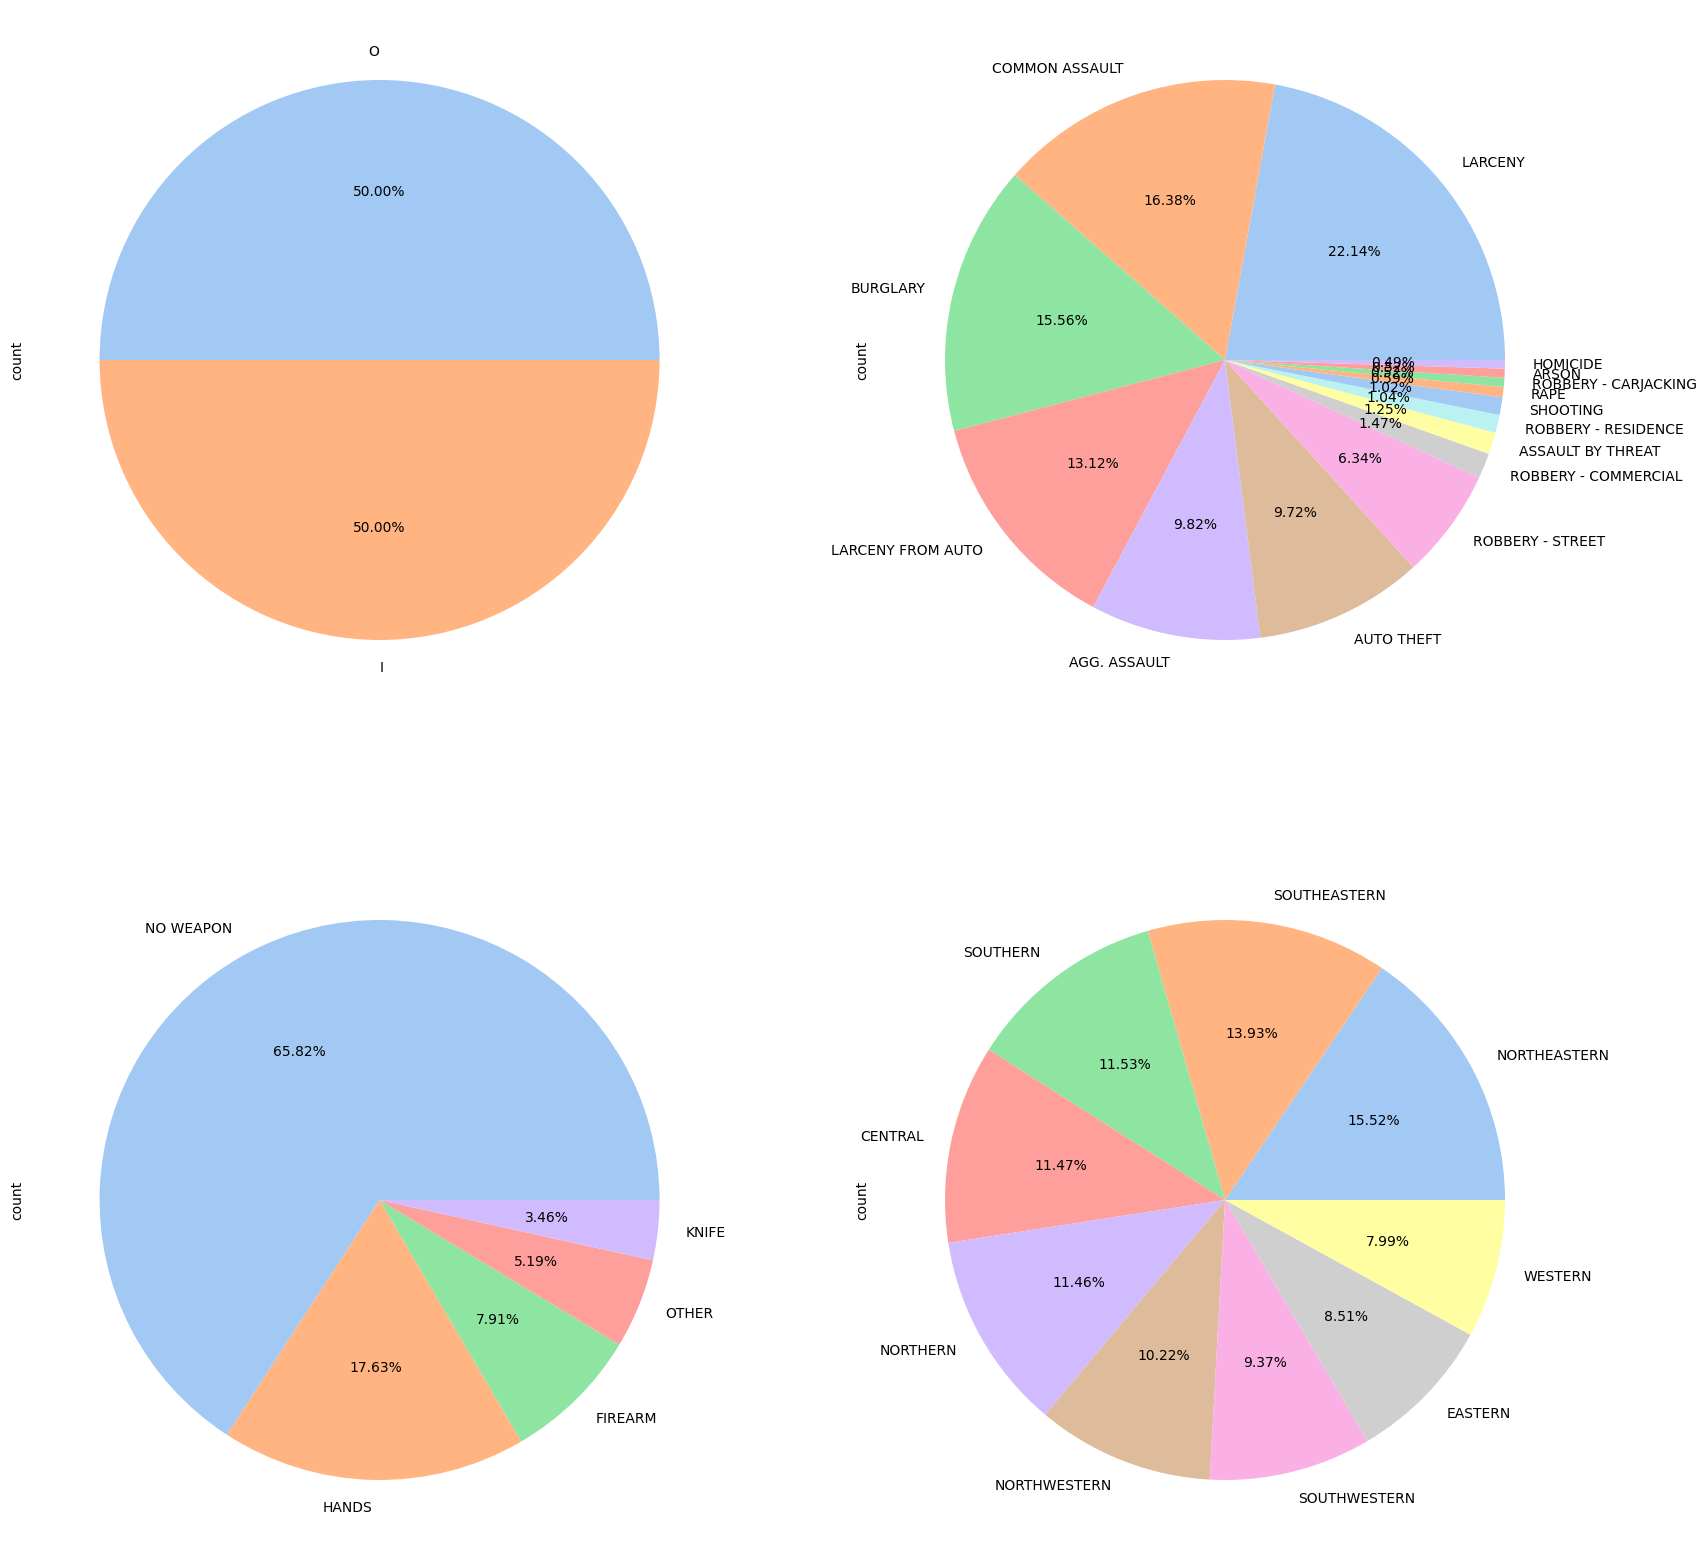

In [18]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax = ax.ravel()

crimeLoc = cleaned_df['Inside/Outside'].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(crimeLoc)]
crimeLoc.plot(kind = 'pie', colors=piec_colors, autopct='%1.2f%%', ax=ax[0])

crimeDescription = cleaned_df.Description.value_counts()
piec_colors = sns.color_palette('pastel')[0:len(crimeDescription)]
crimeDescription.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax = ax[1])

weaponUsed = cleaned_df.Weapon.value_counts()
piec_colors = sns.color_palette('pastel')[0:len(weaponUsed)]
weaponUsed.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[2])

district = cleaned_df.District.value_counts()
piec_colors = sns.color_palette('pastel')[0:len(district)]
district.plot(kind='pie', colors=piec_colors, autopct ='%1.2f%%', ax=ax[3])
fig.show()

The first pie chart shows whether a crime was commited outside(on road) or inside (within house/ building). After data cleaning, the dataset has perfect division of crimes inside and outside.

The second pie chart describes the count of crimes using crime description. Major crimes are described as Larceny, Burglary and Assault.

The third pie chart describes the count of crimes using type of weapons used. In most of the crimes, either their is no weapon used or they are committed by hands.

The fourth pie chart describes the count of crimes using District Division. The crime rate is least in Western and Southern Baltimore.

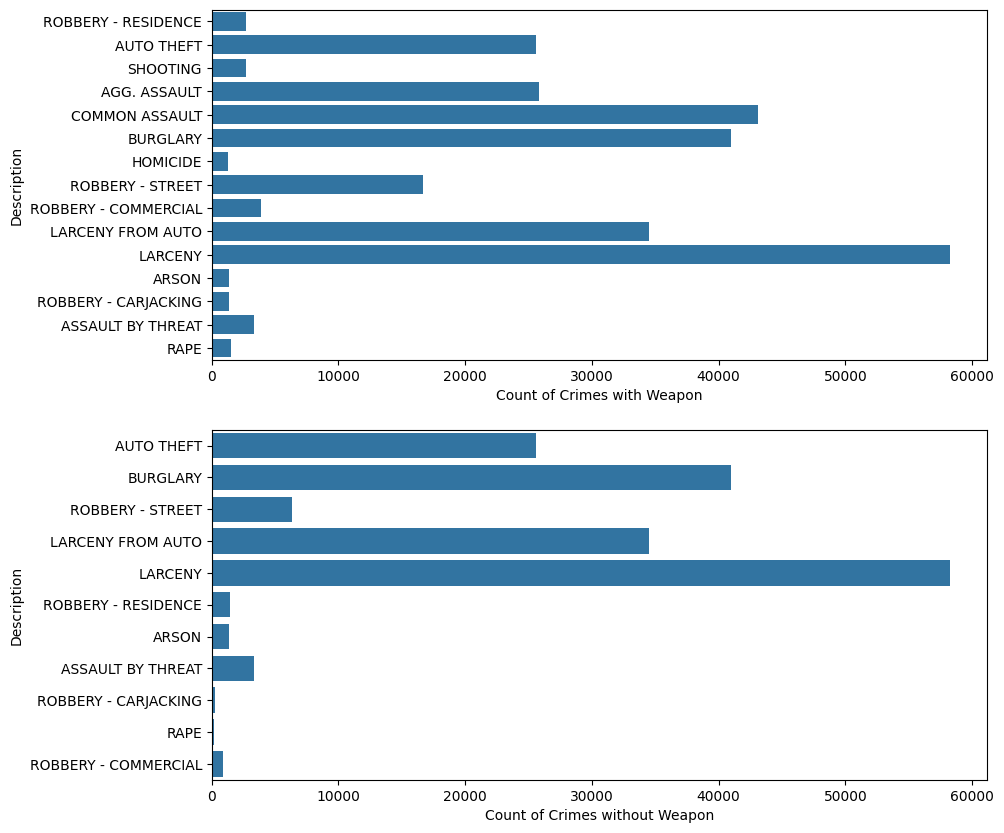

In [19]:
#Show this to prove that null values = no weapons used. This has already been proved before in data cleaning, here is a visual representation.
fig, ax = plt.subplots(2,1)
sns.countplot(y = cleaned_df['Description'], ax = ax[0]).set_xlabel('Count of Crimes with Weapon')
dfNull = cleaned_df[cleaned_df['Weapon']=="NO WEAPON"]
sns.countplot(y= dfNull['Description'], ax = ax[1]).set_xlabel('Count of Crimes without Weapon')
fig.set_size_inches(10,10)
fig.show()

It is reasonable to assume that null values for weapons indicate that there was no use of a weapon when comparing the two categories of crimes committed with and without weapons. Let's substitute "NO WEAPON" for the nulls.

To find relations with CrimeTime, time needs to be striped into hours, mins and date into year, month, and weekday.

In [20]:
cleaned_df['CrimeTime'] = cleaned_df['CrimeTime'].str.replace('24:00:00', '00:00:00')

In [21]:
cleaned_df['Date'] = cleaned_df['CrimeDate'] + ' ' + cleaned_df['CrimeTime']
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date']) #Converting to pandas datetime so that it can be split easily.

In [22]:
cleaned_df['Day'] = cleaned_df['Date'].dt.day
cleaned_df['Month'] = cleaned_df['Date'].dt.month
cleaned_df['Year'] = cleaned_df['Date'].dt.year
cleaned_df['Weekday'] = cleaned_df['Date'].dt.weekday + 1 #To convert to 1-based indexing
cleaned_df['Hour'] = cleaned_df['Date'].dt.hour

In [23]:
cleaned_df.drop(['CrimeDate', 'CrimeTime'], axis = 1, inplace=True)

In [24]:
cleaned_df.set_index('Date', inplace=True)

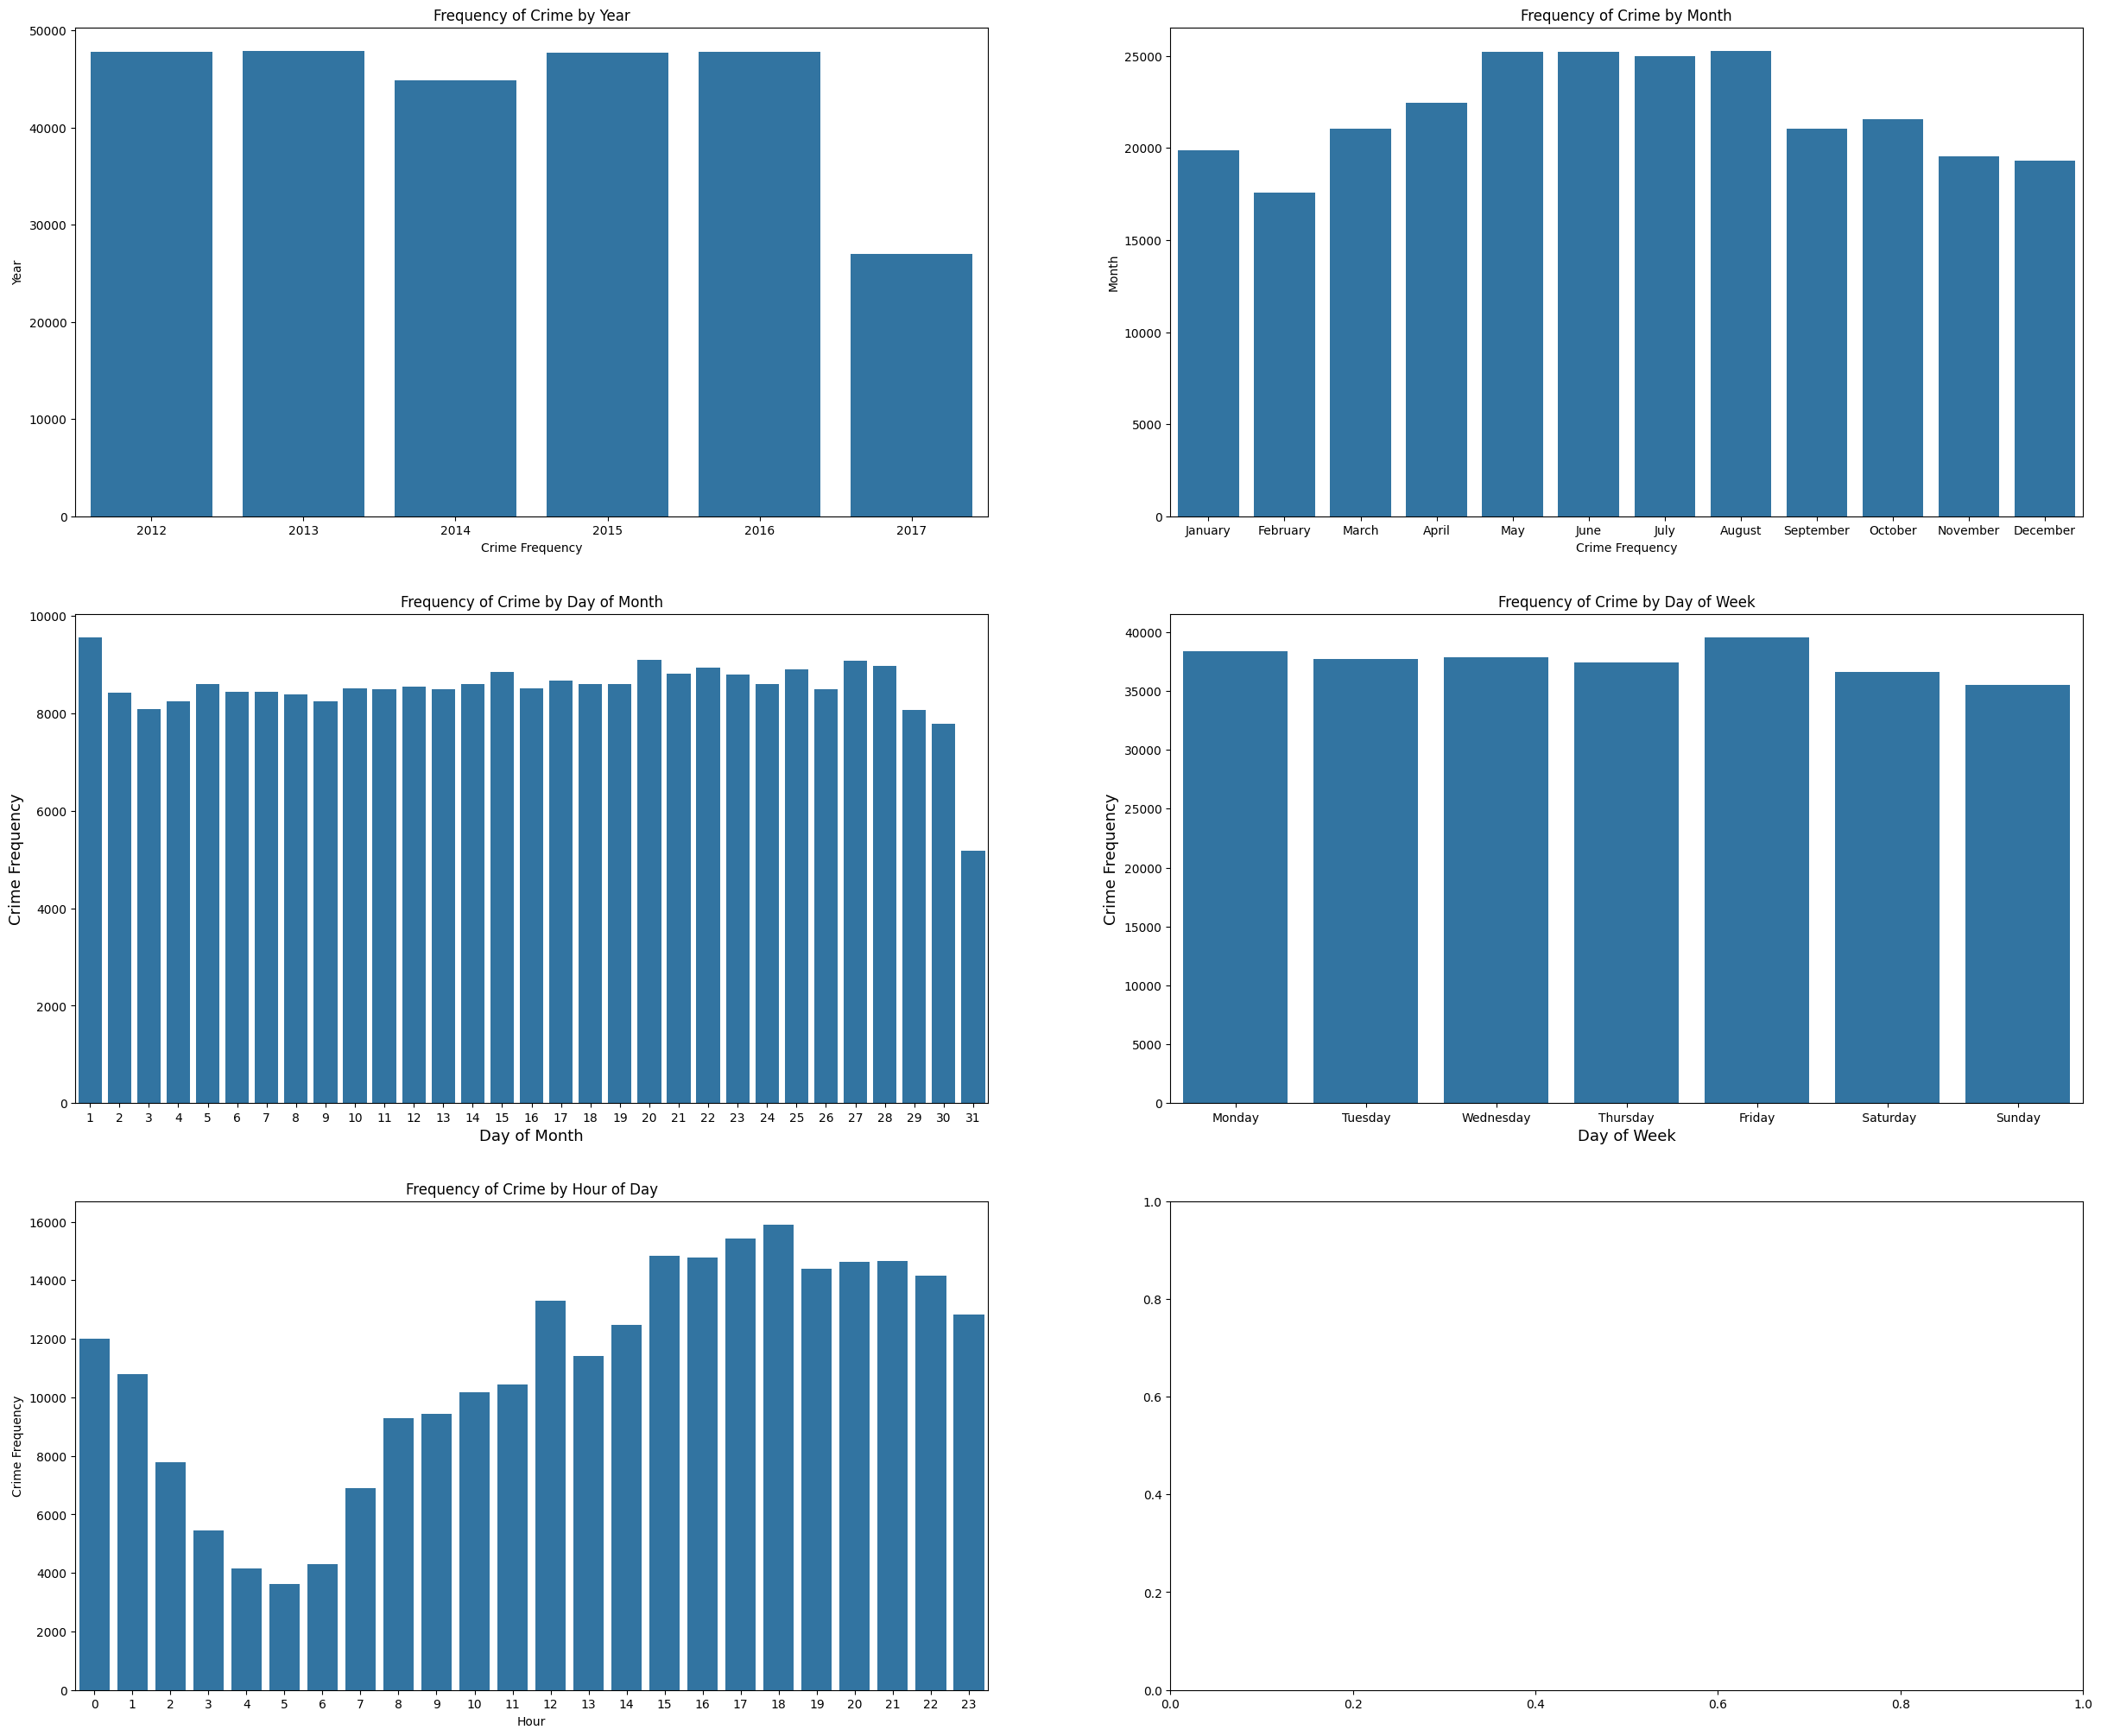

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(30,25))
ax = ax.ravel()

ax[0].set_title('Frequency of Crime by Year')
fig1 = sns.countplot(x = 'Year', data = cleaned_df, ax=ax[0])
fig1.set_xlabel('Crime Frequency')
fig1.set_ylabel('Year')


ax[1].set_title('Frequency of Crime by Month')
fig2 = sns.countplot(x = 'Month', data = cleaned_df, ax=ax[1])
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig2.set_xticklabels(labels)
fig2.set_xlabel('Crime Frequency')
fig2.set_ylabel('Month')

ax[2].set_title('Frequency of Crime by Day of Month')
fig3 = sns.countplot(x = 'Day', data = cleaned_df, ax=ax[2])
fig3.set_ylabel("Crime Frequency", fontsize=13)
fig3.set_xlabel('Day of Month', fontsize=13)

ax[3].set_title('Frequency of Crime by Day of Week')
fig3 = sns.countplot(x = 'Weekday', data = cleaned_df, ax=ax[3])
fig3.set_ylabel("Crime Frequency", fontsize=13)
fig3.set_xlabel('Day of Week', fontsize=13)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
fig3.set_xticklabels(labels)

ax[4].set_title('Frequency of Crime by Hour of Day')
fig4 = sns.countplot(x = 'Hour', data = cleaned_df, ax=ax[4])
fig4.set_ylabel("Crime Frequency")
fig4.set_xlabel('Hour')

fig.show()

The first bar graph shows frequency of crime by year. The crime rate is almost constant for each year. The dip is the year 2017 is mostly due to incomplete data for the rest of the year.

The second bar graph shows frequency of crime by month. The crime rate is relatively high in the middle months of the year.

The third bar graph shows frequency of crime by day of month.The crime rate is same throughout every days of the month, we can see a relative dip at the end of the month.

The fourth bar graph shows frequency of crime by day of week. The crime rate is unifoem for every day of the week.  

The fifth bar graph shows frequency of crime by hour of day. Thr crime rate is low at midnight and early morning hours.

In [26]:
Description_list = cleaned_df.Description.unique()

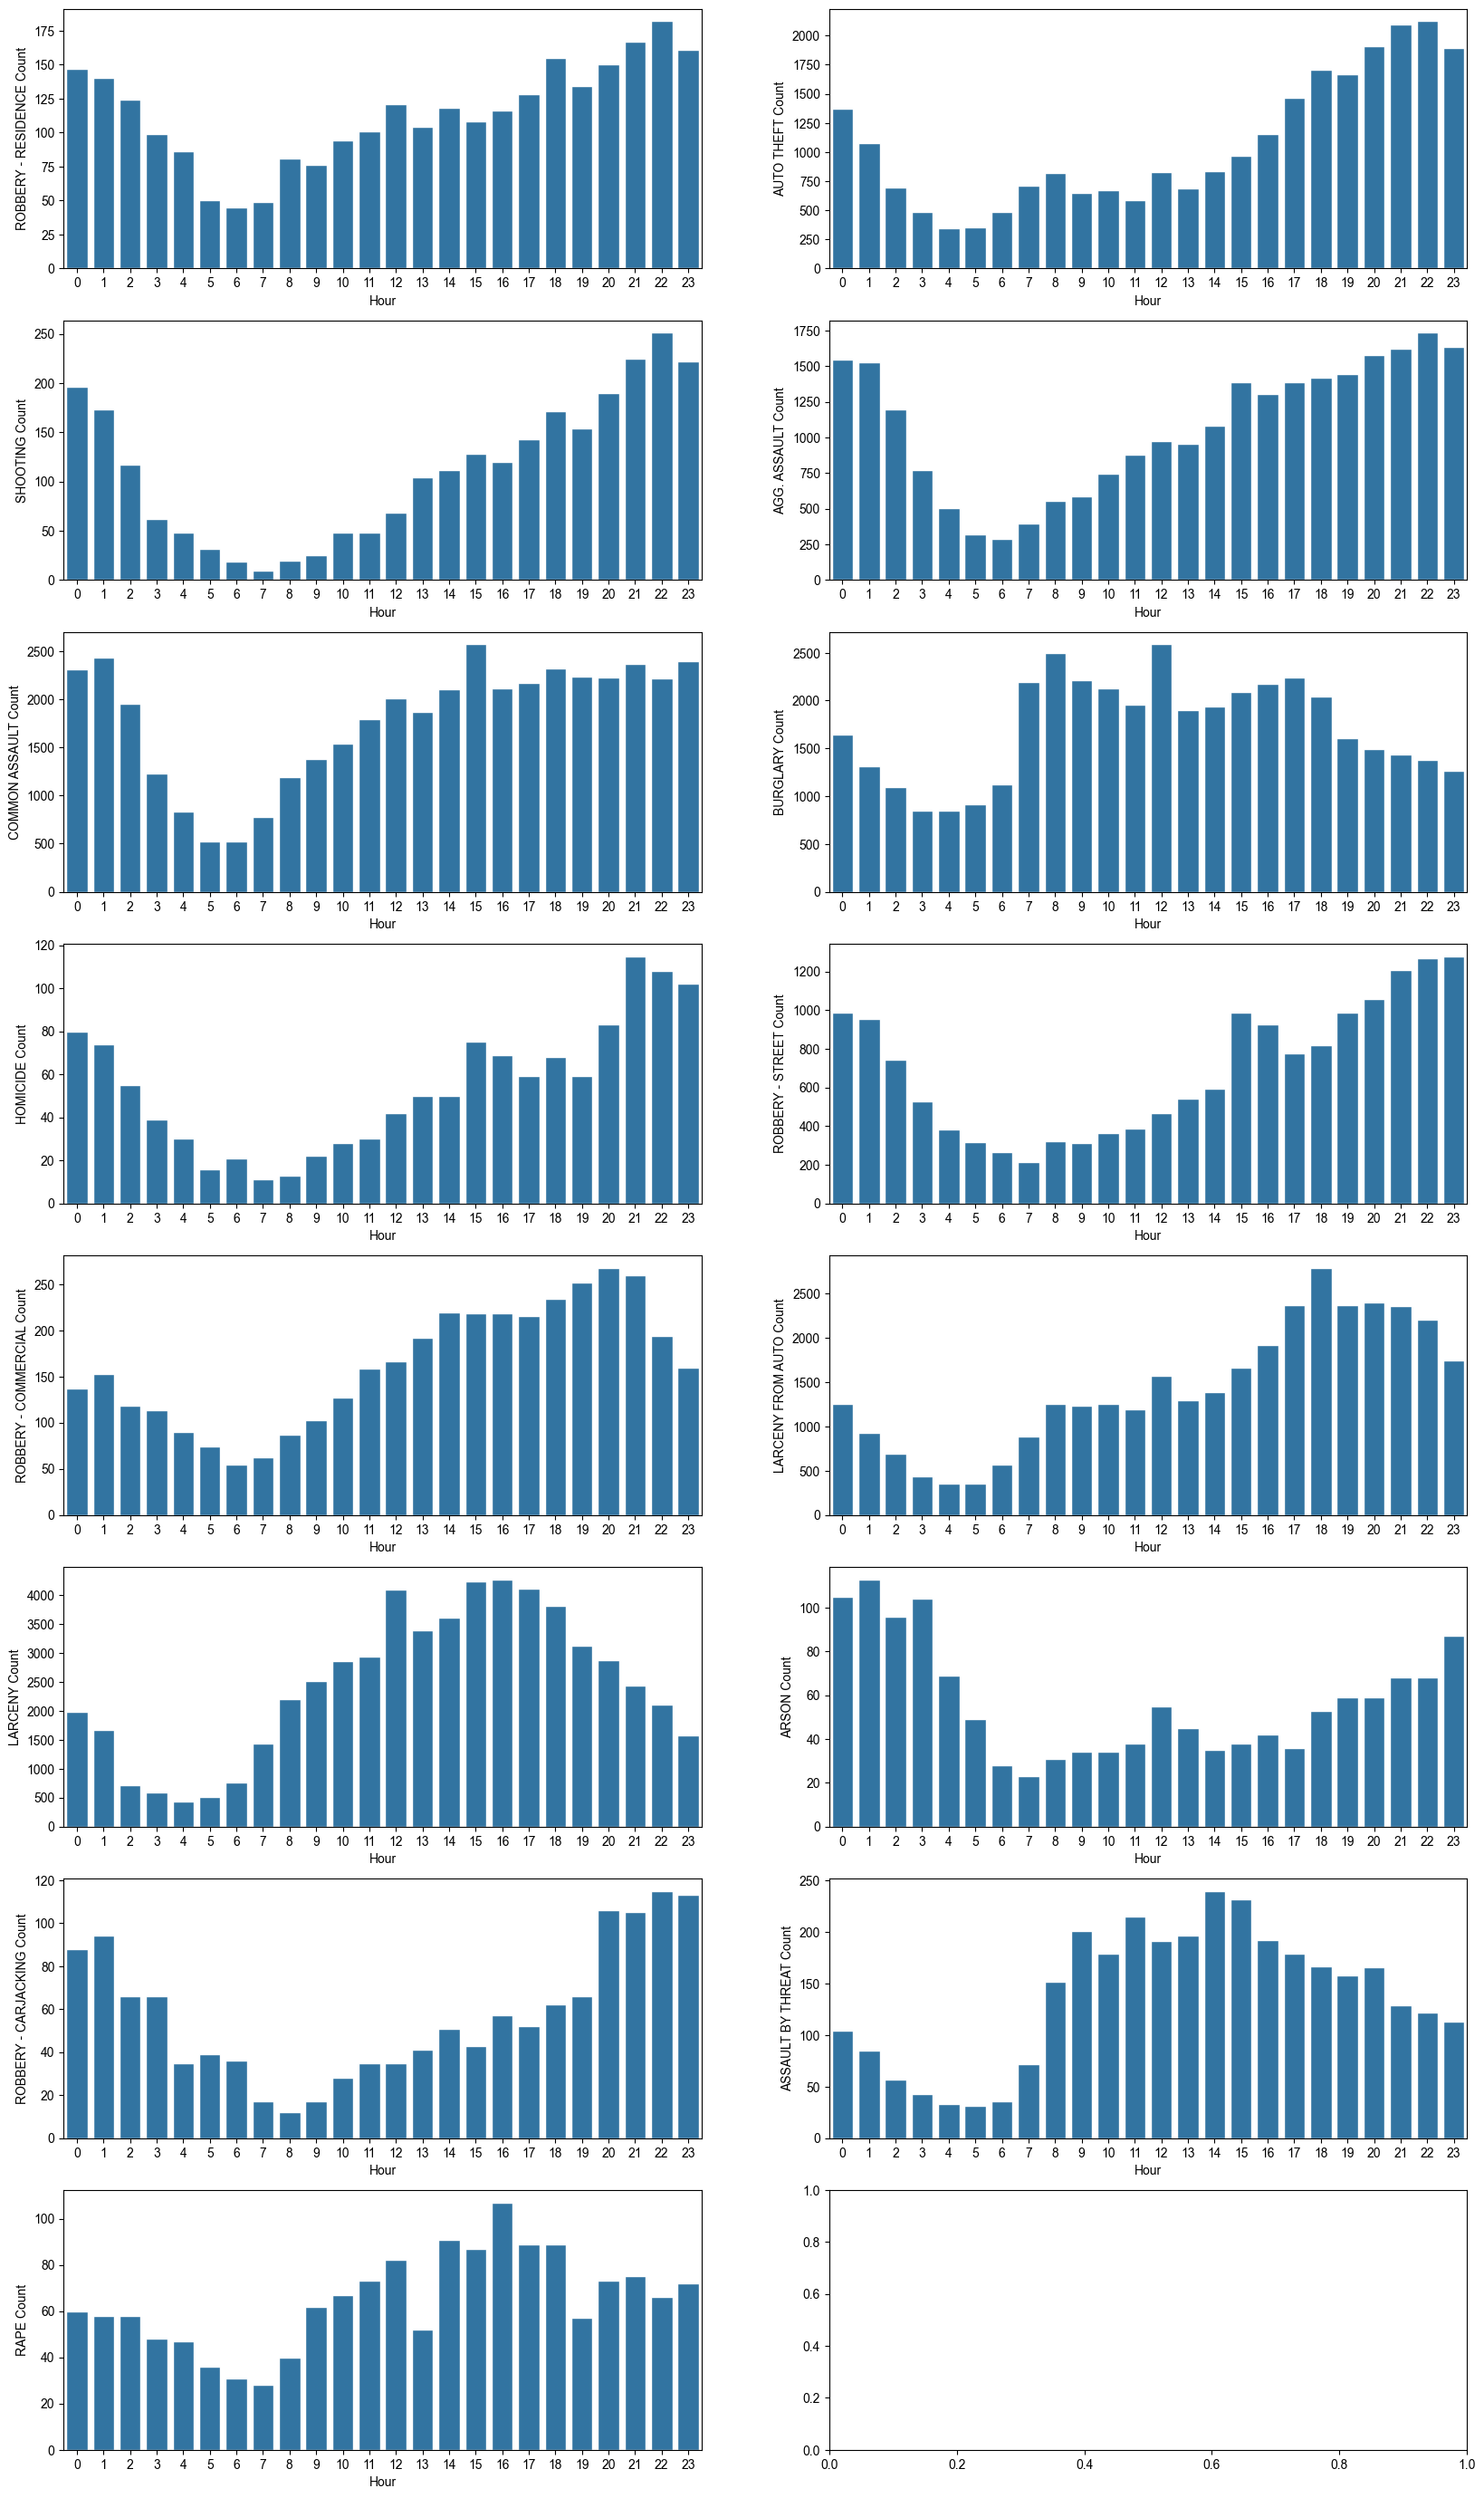

In [27]:
fig,ax = plt.subplots(8,2, figsize=(20,35))

ax=ax.ravel()
sns.set_theme(style='whitegrid')
for axid,col in enumerate(Description_list):
    sns.countplot(x= 'Hour', data = cleaned_df[cleaned_df.Description==col] , ax=ax[axid]).set_ylabel(col + ' Count')

The graphs describe different crime description count by hour of day. Larceny, Robbery, Burglary, Assault and Rape related crimes are more during mid-day time, while rest crimes are more during mid-night time.

Folium Map

In [28]:
import folium
from folium.plugins import HeatMap

In [29]:
cleaned_df['Latitude'].median()

39.30368

In [30]:
cleaned_df['Longitude'].median()

-76.61401

In [31]:
def createMap(defaultLocation=[39.30368, -76.61401], defaultZoomStart=12):
    # Provide attribution for the custom tiles
    tiles = "Stamen Toner"
    attribution = "Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL."
    
    defMap = folium.Map(
        location=defaultLocation,
        control_scale=True,
        tiles=tiles,
        attr=attribution,  # Pass the attribution here
        zoom_start=defaultZoomStart
    )
    return defMap

map = createMap()


In [32]:
# def createMap(defaultLocation = [39.30368, -76.61401], defaultZoomStart = 12):
#     defMap = folium.Map(location = defaultLocation, control_scale = True, tiles="Stamen Toner", zoom_start = defaultZoomStart)
#     return defMap

In [33]:
# map = createMap()

In [34]:
cleaned_df['count'] = 1

In [35]:
df_murder = cleaned_df[cleaned_df['Description'] == 'HOMICIDE']

In [36]:
HeatMap(
        data = df_murder[['Latitude', 'Longitude', 'count']].groupby(
            ['Latitude', 'Longitude']).sum().reset_index().values.tolist(),
        radius = 8,
        max_zoom = 13).add_to(map)
map

# 4. Pre-Processing

In this part we are going to do preprocessing on the cleaned data which we stored as form of cleaned.csv file

In [37]:
# cleaned_df.columns
# cleaned_df.drop(columns = ['Unnamed: 0'], inplace=True)

Creating a dictionary mapping unique crime codes with descriptions

In [38]:
# cleaned_df.reset_index(inplace=True)
crime_dict = dict(zip(cleaned_df['CrimeCode'], cleaned_df['Description'].values))

print(crime_dict)
cleaned_df['CrimeCodeBackup'] = cleaned_df['CrimeCode']
cleaned_df['DescriptionBackup'] = cleaned_df['Description']
cleaned_df.head()

{'3JK': 'ROBBERY - RESIDENCE', '7A': 'AUTO THEFT', '9S': 'SHOOTING', '4C': 'AGG. ASSAULT', '4E': 'COMMON ASSAULT', '5A': 'BURGLARY', '1F': 'HOMICIDE', '3B': 'ROBBERY - STREET', '3CF': 'ROBBERY - COMMERCIAL', '6D': 'LARCENY FROM AUTO', '5D': 'BURGLARY', '6G': 'LARCENY', '6J': 'LARCENY', '5B': 'BURGLARY', '4D': 'AGG. ASSAULT', '3K': 'ROBBERY - RESIDENCE', '3AF': 'ROBBERY - STREET', '6B': 'LARCENY', '4B': 'AGG. ASSAULT', '3AK': 'ROBBERY - STREET', '7C': 'AUTO THEFT', '3AO': 'ROBBERY - STREET', '8AO': 'ARSON', '6E': 'LARCENY', '4A': 'AGG. ASSAULT', '6C': 'LARCENY', '6F': 'LARCENY', '6H': 'LARCENY', '3AJF': 'ROBBERY - CARJACKING', '3JF': 'ROBBERY - RESIDENCE', '4F': 'ASSAULT BY THREAT', '3GF': 'ROBBERY - COMMERCIAL', '2A': 'RAPE', '5F': 'BURGLARY', '8H': 'ARSON', '8AV': 'ARSON', '5C': 'BURGLARY', '3GO': 'ROBBERY - COMMERCIAL', '3BJ': 'ROBBERY - CARJACKING', '3CK': 'ROBBERY - COMMERCIAL', '1O': 'HOMICIDE', '3AJO': 'ROBBERY - CARJACKING', '3JO': 'ROBBERY - RESIDENCE', '5E': 'BURGLARY', '3AJK'

CrimeCode           Location          Description   
Date                                                                    
2017-09-02 23:30:00       3JK    4200 AUDREY AVE  ROBBERY - RESIDENCE  \
2017-09-02 23:00:00        7A  800 NEWINGTON AVE           AUTO THEFT   
2017-09-02 22:53:00        9S      600 RADNOR AV             SHOOTING   
2017-09-02 22:50:00        4C     1800 RAMSAY ST         AGG. ASSAULT   
2017-09-02 22:31:00        4E       100 LIGHT ST       COMMON ASSAULT   

                    Inside/Outside     Weapon  Post  District   
Date                                                            
2017-09-02 23:30:00              I      KNIFE   913  SOUTHERN  \
2017-09-02 23:00:00              O  NO WEAPON   133   CENTRAL   
2017-09-02 22:53:00              O    FIREARM   524  NORTHERN   
2017-09-02 22:50:00              I      OTHER   934  SOUTHERN   
2017-09-02 22:31:00              O      HANDS   113   CENTRAL   

                         Neighborhood  Longitude  Latitude     Premise  Day   
Date                                                                          
2017-09-02 23:30:00          Brooklyn  -76.60541  39.22951  ROW/TOWNHO    2  \
2017-09-02 23:00:00    Reservoir Hill  -76.63217  39.31360      STREET    2   
2017-09-02 22:53:00    Winston-Govans  -76.60697  39.34768      Street    2   
2017-09-02 22:50:00  Carrollton Ridge  -76.64526  39.28315  ROW/TOWNHO    2   
2017-09-02 22:31:00     Downtown West  -76.61365  39.28756      STREET    2   

                     Month  Year  Weekday  Hour  count CrimeCodeBackup   
Date                                                                     
2017-09-02 23:30:00      9  2017        6    23      1             3JK  \
2017-09-02 23:00:00      9  2017        6    23      1              7A   
2017-09-02 22:53:00      9  2017        6    22      1              9S   
2017-09-02 22:50:00      9  2017        6    22      1              4C   
2017-09-02 22:31:00      9  2017        6    22      1              4E   

                       DescriptionBackup  
Date                                      
2017-09-02 23:30:00  ROBBERY - RESIDENCE  
2017-09-02 23:00:00           AUTO THEFT  
2017-09-02 22:53:00             SHOOTING  
2017-09-02 22:50:00         AGG. ASSAULT  
2017-09-02 22:31:00       COMMON ASSAULT

Adding 'Location 1' columns back into the dataset to make pre-processing easy and removing 'Latitude' and 'Longitude', which will be unnecessary.

In [39]:
def combine(row):
    return str(tuple([row['Latitude']] + [row['Longitude']]))

In [40]:
cleaned_df['Location 1'] = cleaned_df.apply(combine, axis=1)

Combining Day, month, year, weekday, hour to make CrimeTime column.

In [41]:
# Bringing back original indexing, to retain Date column
cleaned_df.reset_index(inplace=True)

In [42]:
cleaned_df[['CrimeDate', 'CrimeTime']] = cleaned_df['Date'].astype(str).str.split(' ', n=1, expand=True)

In [43]:
cleaned_df.head()

Date CrimeCode           Location          Description   
0 2017-09-02 23:30:00       3JK    4200 AUDREY AVE  ROBBERY - RESIDENCE  \
1 2017-09-02 23:00:00        7A  800 NEWINGTON AVE           AUTO THEFT   
2 2017-09-02 22:53:00        9S      600 RADNOR AV             SHOOTING   
3 2017-09-02 22:50:00        4C     1800 RAMSAY ST         AGG. ASSAULT   
4 2017-09-02 22:31:00        4E       100 LIGHT ST       COMMON ASSAULT   

  Inside/Outside     Weapon  Post  District      Neighborhood  Longitude  ...   
0              I      KNIFE   913  SOUTHERN          Brooklyn  -76.60541  ...  \
1              O  NO WEAPON   133   CENTRAL    Reservoir Hill  -76.63217  ...   
2              O    FIREARM   524  NORTHERN    Winston-Govans  -76.60697  ...   
3              I      OTHER   934  SOUTHERN  Carrollton Ridge  -76.64526  ...   
4              O      HANDS   113   CENTRAL     Downtown West  -76.61365  ...   

   Month  Year  Weekday  Hour  count  CrimeCodeBackup    DescriptionBackup   
0      9  2017        6    23      1              3JK  ROBBERY - RESIDENCE  \
1      9  2017        6    23      1               7A           AUTO THEFT   
2      9  2017        6    22      1               9S             SHOOTING   
3      9  2017        6    22      1               4C         AGG. ASSAULT   
4      9  2017        6    22      1               4E       COMMON ASSAULT   

              Location 1   CrimeDate CrimeTime  
0  (39.22951, -76.60541)  2017-09-02  23:30:00  
1   (39.3136, -76.63217)  2017-09-02  23:00:00  
2  (39.34768, -76.60697)  2017-09-02  22:53:00  
3  (39.28315, -76.64526)  2017-09-02  22:50:00  
4  (39.28756, -76.61365)  2017-09-02  22:31:00  

[5 rows x 23 columns]

In [44]:
cleaned_df.columns

Index(['Date', 'CrimeCode', 'Location', 'Description', 'Inside/Outside',
       'Weapon', 'Post', 'District', 'Neighborhood', 'Longitude', 'Latitude',
       'Premise', 'Day', 'Month', 'Year', 'Weekday', 'Hour', 'count',
       'CrimeCodeBackup', 'DescriptionBackup', 'Location 1', 'CrimeDate',
       'CrimeTime'],
      dtype='object')

Dropping unnecessary columns like, 'Latitude', 'Longitude', 'Date', 'Day', 'Weekday', etc.

In [45]:
cleaned_df.drop(['Latitude', 'Longitude', 'Date', 'Day', 'Month', 'Year', 'Weekday', 'Hour', 'count'], axis=1, inplace=True)

In [46]:
cleaned_df.head(7)

CrimeCode           Location          Description Inside/Outside     Weapon   
0       3JK    4200 AUDREY AVE  ROBBERY - RESIDENCE              I      KNIFE  \
1        7A  800 NEWINGTON AVE           AUTO THEFT              O  NO WEAPON   
2        9S      600 RADNOR AV             SHOOTING              O    FIREARM   
3        4C     1800 RAMSAY ST         AGG. ASSAULT              I      OTHER   
4        4E       100 LIGHT ST       COMMON ASSAULT              O      HANDS   
5        5A     CHERRYCREST RD             BURGLARY              I  NO WEAPON   
6        1F    3400 HARMONY CT             HOMICIDE              O    FIREARM   

   Post      District      Neighborhood     Premise CrimeCodeBackup   
0   913      SOUTHERN          Brooklyn  ROW/TOWNHO             3JK  \
1   133       CENTRAL    Reservoir Hill      STREET              7A   
2   524      NORTHERN    Winston-Govans      Street              9S   
3   934      SOUTHERN  Carrollton Ridge  ROW/TOWNHO              4C   
4   113       CENTRAL     Downtown West      STREET              4E   
5   922      SOUTHERN       Cherry Hill  ROW/TOWNHO              5A   
6   232  SOUTHEASTERN            Canton      Street              1F   

     DescriptionBackup             Location 1   CrimeDate CrimeTime  
0  ROBBERY - RESIDENCE  (39.22951, -76.60541)  2017-09-02  23:30:00  
1           AUTO THEFT   (39.3136, -76.63217)  2017-09-02  23:00:00  
2             SHOOTING  (39.34768, -76.60697)  2017-09-02  22:53:00  
3         AGG. ASSAULT  (39.28315, -76.64526)  2017-09-02  22:50:00  
4       COMMON ASSAULT  (39.28756, -76.61365)  2017-09-02  22:31:00  
5             BURGLARY  (39.24867, -76.62131)  2017-09-02  22:00:00  
6             HOMICIDE  (39.28202, -76.56827)  2017-09-02  21:15:00

In [47]:
cleaned_df.columns

Index(['CrimeCode', 'Location', 'Description', 'Inside/Outside', 'Weapon',
       'Post', 'District', 'Neighborhood', 'Premise', 'CrimeCodeBackup',
       'DescriptionBackup', 'Location 1', 'CrimeDate', 'CrimeTime'],
      dtype='object')

In [48]:
feature_list = ["CrimeDate" , "CrimeTime" , "CrimeCode" , "Location" , "Description" , "Inside/Outside" , "Weapon" , "Post" , "District" , "Neighborhood" , "Location 1" ,"Premise" ]
print(feature_list)

['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description', 'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood', 'Location 1', 'Premise']


converting time stamp to minutes

In [49]:
def convert(timestamp):
    hour = timestamp[0] + timestamp[1]
    minutes = timestamp[3] + timestamp[4]
    return int(hour)*60 + int(minutes)

applying lambda function to convert all the timestamp to correponding minutes

In [50]:
cleaned_df[feature_list[1]] = cleaned_df[feature_list[1]].apply(lambda x : convert(x))
cleaned_df['CrimeTime']

0         1410
1         1380
2         1373
3         1370
4         1351
          ... 
263113       0
263114       0
263115       0
263116       0
263117       0
Name: CrimeTime, Length: 263118, dtype: int64

### Encoding the categorical features

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
for ind , col in enumerate(feature_list):
    if(col not in ['CrimeTime']):
        le = LabelEncoder()
        label = le.fit_transform(cleaned_df[col])
        cleaned_df[col] = label + 1

In [53]:
cleaned_df.head(7)

CrimeCode  Location  Description  Inside/Outside  Weapon  Post  District   
0         27     15618           13               1       3   114         7  \
1         61     22481            4               2       4     9         1   
2         80     20325           15               2       1    65         4   
3         40      5265            1               1       5   121         7   
4         42       932            6               2       2     3         1   
5         44     23781            5               1       4   116         7   
6          1     12320            7               2       1    21         6   

   Neighborhood  Premise CrimeCodeBackup    DescriptionBackup  Location 1   
0            27       96             3JK  ROBBERY - RESIDENCE         898  \
1           215      106              7A           AUTO THEFT       52656   
2           269      109              9S             SHOOTING       80321   
3            38       96              4C         AGG. ASSAULT       15312   
4            64      106              4E       COMMON ASSAULT       21549   
5            46       96              5A             BURGLARY        3482   
6            33      109              1F             HOMICIDE       13756   

   CrimeDate  CrimeTime  
0       2072       1410  
1       2072       1380  
2       2072       1373  
3       2072       1370  
4       2072       1351  
5       2072       1320  
6       2072       1275

## Feature Selection

*   we will plot a heatmap of out dataframe to see the correlation between different feature.
*   We can drop those feature with high correlation to avoid the data redundancy.

<Axes: >

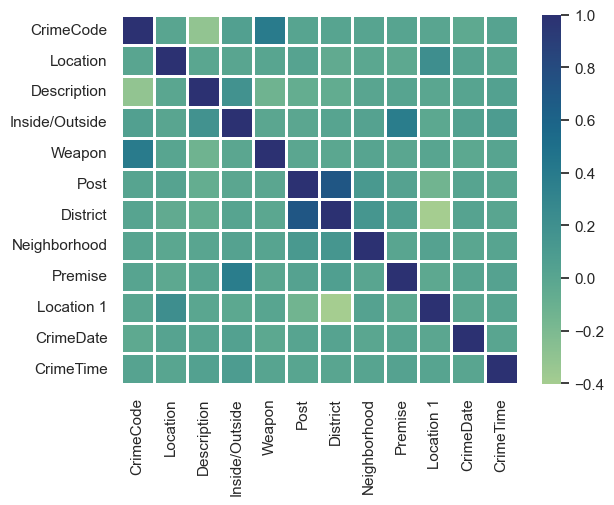

In [54]:
columns_to_ignore = ['CrimeCodeBackup', 'DescriptionBackup']  # Replace 'Column1', 'Column2' with the columns you want to ignore

# Create a subset of the DataFrame without the columns to be ignored
subset_df = cleaned_df.drop(columns=columns_to_ignore)

# Calculate the correlation matrix for the subset DataFrame
# correlation_matrix = subset_df.corr()
sns.heatmap(subset_df.corr() , lw = 1 , cmap="crest")

It seems like there is no strong correlation between the attributes.

## Outliers Detection

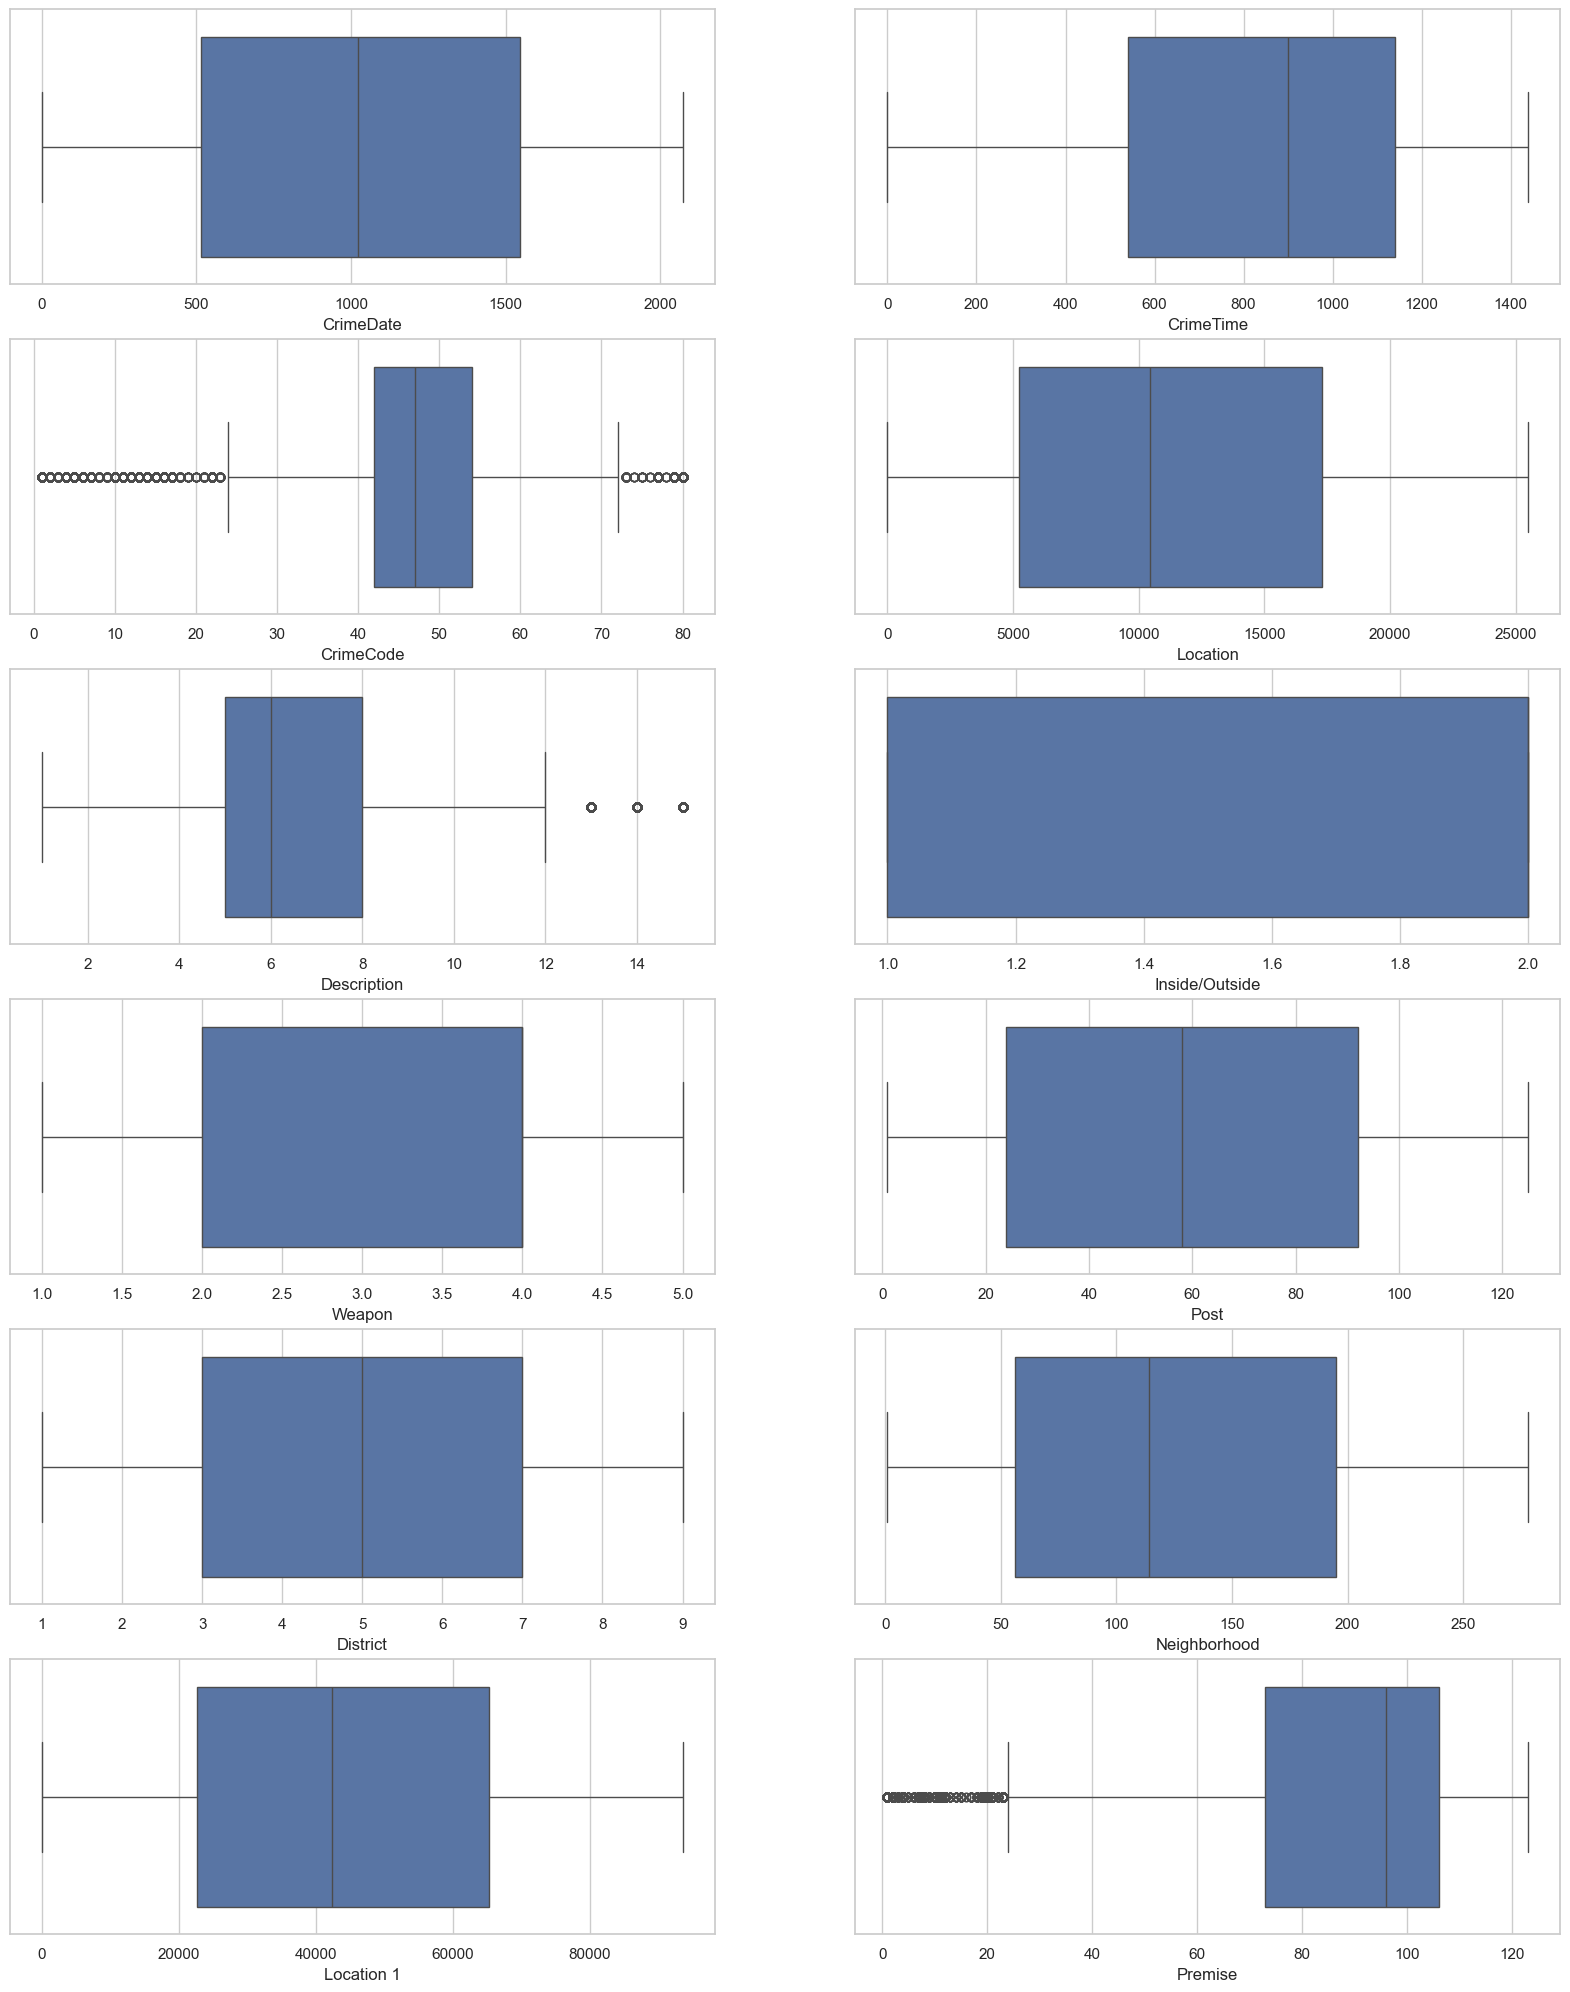

In [55]:
fig, ax = plt.subplots(6 , 2 , figsize=(20, 25))

# flattening the 2D axis into 1D

ax = ax.ravel()

sns.set_theme(style="whitegrid")
for axid, col in enumerate(feature_list):
    sns.boxplot(x=cleaned_df[col], ax=ax[axid])

we can see there are certain out liers in crime code , premise and description.

## Inter Quartile Range

In [56]:
quantile_remove_list = ['Premise' , 'Description' , 'CrimeCode']

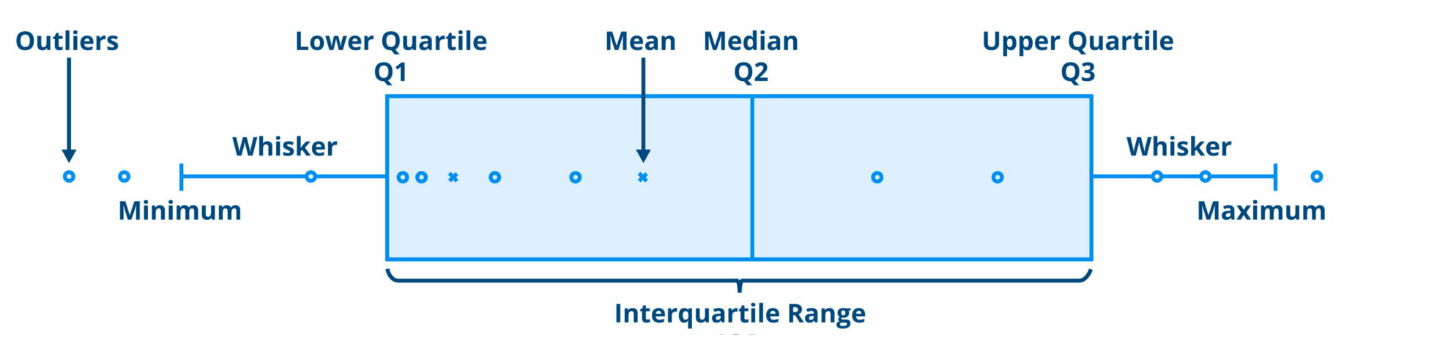

In [57]:
for ind , col in enumerate(quantile_remove_list):
    Q1 = np.percentile(cleaned_df[col], 25, method='midpoint')
    Q3 = np.percentile(cleaned_df[col], 75, method='midpoint')
    IRQ = Q3 - Q1
    # upper range is always Q3 + 1.5*IRQ
    # lower range is always Q1 - 1.5*IRQ
    upper_range = Q3 + 1.5*IRQ
    lower_range = Q1 - 1.5*IRQ
    cleaned_df = cleaned_df[cleaned_df[col] >= lower_range]
    cleaned_df = cleaned_df[cleaned_df[col] <= upper_range]

In [58]:
cleaned_df.shape

(215392, 14)

In [59]:
crime_dict = dict(zip(cleaned_df['CrimeCode'], cleaned_df['DescriptionBackup'].values))

In [60]:
columns_to_ignore = ['CrimeCodeBackup', 'DescriptionBackup']  # Replace 'Column1', 'Column2' with the columns you want to ignore

# Create a subset of the DataFrame without the columns to be ignored
cleaned_df = cleaned_df.drop(columns=columns_to_ignore)
cleaned_df.to_csv("preprocessed.csv", index=False)

we are finally left with 215392 instances and 12 columns.

In [61]:
# if len(list(cleaned_df['CrimeCode'])) >= len(crime_dict):
#     crimeDict = dict(zip(list(cleaned_df['CrimeCode'])[:len(crime_dict)], crime_dict.values()))
#     print(crimeDict)
# else:
#     print("Number of new keys is less than the number of original keys in the dictionary.")

In [62]:
# is_present = 43 in cleaned_df['CrimeCode'].values
# is_present

In [63]:
# cleaned_df

# 5. Modeling

### What are we going to predict ?
Based on the preprocesed attributes we are going to predict Crime.


In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [65]:
pre_df = pd.read_csv("preprocessed.csv")

In [66]:
pre_df.head()

CrimeCode  Location  Description  Inside/Outside  Weapon  Post  District   
0         61     22481            4               2       4     9         1  \
1         40      5265            1               1       5   121         7   
2         42       932            6               2       2     3         1   
3         44     23781            5               1       4   116         7   
4         40      7536            1               2       5    82         5   

   Neighborhood  Premise  Location 1  CrimeDate  CrimeTime  
0           215      106       52656       2072       1380  
1            38       96       15312       2072       1370  
2            64      106       21549       2072       1351  
3            46       96        3482       2072       1320  
4           268      106       52781       2072       1260

In [67]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215392 entries, 0 to 215391
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   CrimeCode       215392 non-null  int64
 1   Location        215392 non-null  int64
 2   Description     215392 non-null  int64
 3   Inside/Outside  215392 non-null  int64
 4   Weapon          215392 non-null  int64
 5   Post            215392 non-null  int64
 6   District        215392 non-null  int64
 7   Neighborhood    215392 non-null  int64
 8   Premise         215392 non-null  int64
 9   Location 1      215392 non-null  int64
 10  CrimeDate       215392 non-null  int64
 11  CrimeTime       215392 non-null  int64
dtypes: int64(12)
memory usage: 19.7 MB


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Extract features and target variable
X = pre_df.drop(columns=['CrimeCode'])  # Features excluding the target variable
y = pre_df['CrimeCode']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (172313, 11)
X_test shape: (43079, 11)
y_train shape: (172313,)
y_test shape: (43079,)


In [69]:
# Convert data type to numeric
X_train = X_train.astype(float)
X_test = X_test.astype(float)

## Training Neural Net Models

In [70]:

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


## RNN

In [71]:
# Convert the target variable to categorical if not already
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Build RNN model
num_classes = y_train_categorical.shape[1]  # Number of classes in your multiclass problem

modelRNN = Sequential()
modelRNN.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
modelRNN.add(Dense(units=num_classes, activation='softmax'))  # Use softmax for multiclass classification

# Compile the model
modelRNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy for multiclass classification

# Train the model
history = modelRNN.fit(X_train, y_train_categorical, epochs=15, batch_size=32, validation_data=(X_test, y_test_categorical))

# Evaluate the model
loss, accuracy = modelRNN.evaluate(X_test, y_test_categorical)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/15
5385/5385 [==============================] - 17s 3ms/step - loss: 0.8008 - accuracy: 0.7707 - val_loss: 0.5694 - val_accuracy: 0.8142
Epoch 2/15
5385/5385 [==============================] - 15s 3ms/step - loss: 0.5508 - accuracy: 0.8165 - val_loss: 0.5323 - val_accuracy: 0.8229
Epoch 3/15
5385/5385 [==============================] - 16s 3ms/step - loss: 0.5282 - accuracy: 0.8230 - val_loss: 0.5200 - val_accuracy: 0.8268
Epoch 4/15
5385/5385 [==============================] - 17s 3ms/step - loss: 0.5171 - accuracy: 0.8257 - val_loss: 0.5101 - val_accuracy: 0.8293
Epoch 5/15
5385/5385 [==============================] - 16s 3ms/step - loss: 0.5097 - accuracy: 0.8270 - val_loss: 0.5051 - val_accuracy: 0.8293
Epoch 6/15
5385/5385 [==============================] - 16s 3ms/step - loss: 0.5047 - accuracy: 0.8288 - val_loss: 0.5036 - val_accuracy: 0.8285
Epoch 7/15
5385/5385 [==============================] - 17s 3ms/step - loss: 0.5014 - accuracy: 0.8299 - val_loss: 0.4973 - val_ac

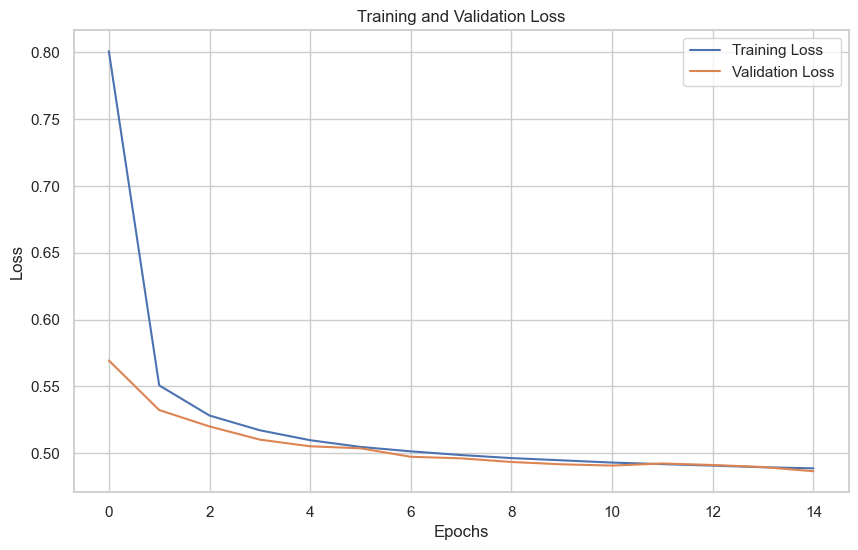

In [72]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
# Get the predicted probabilities for each class
y_pred_prob = modelRNN.predict(X_test)

# Get the predicted classes by selecting the class with the highest probability
y_pred_classes = y_pred_prob.argmax(axis=-1)

# Display predicted classes for X_test
print(y_pred_classes)


1347/1347 [==============================] - 2s 2ms/step
[44 61 53 ... 42 58 61]


In [74]:
# Create a list of tuples with (key, value) pairs from the dictionary
datamap = [(key, crime_dict[key]) for key in y_pred_classes]

# Create a DataFrame from the list of tuples
datamap = pd.DataFrame(datamap, columns=['CrimeCode', 'Description'])

# Display the DataFrame
datamap.head()

CrimeCode        Description
0         44           BURGLARY
1         61         AUTO THEFT
2         53  LARCENY FROM AUTO
3         56            LARCENY
4         56            LARCENY

## LSTM

In [75]:
from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Assuming you have X_train, X_test, y_train, and y_test for your multiclass classification

# Convert the target variable to categorical if not already
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Build LSTM model for multiclass classification
num_classes = y_train_categorical.shape[1]  # Number of classes in your multiclass problem

modelLSTM = Sequential()
modelLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(LSTM(units=50, return_sequences=True))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(LSTM(units=50))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(Dense(units=num_classes, activation='softmax'))  # Use softmax for multiclass classification

# Compile the model
modelLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy for multiclass classification

# Train the model
history = modelLSTM.fit(X_train, y_train_categorical, epochs=25, batch_size=32, validation_data=(X_test, y_test_categorical))

# Evaluate the model
loss, accuracy = modelLSTM.evaluate(X_test, y_test_categorical)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/25
5385/5385 [==============================] - 50s 8ms/step - loss: 0.7607 - accuracy: 0.7647 - val_loss: 0.5315 - val_accuracy: 0.8188
Epoch 2/25
5385/5385 [==============================] - 40s 7ms/step - loss: 0.5472 - accuracy: 0.8160 - val_loss: 0.5185 - val_accuracy: 0.8236
Epoch 3/25
5385/5385 [==============================] - 41s 8ms/step - loss: 0.5347 - accuracy: 0.8215 - val_loss: 0.5100 - val_accuracy: 0.8262
Epoch 4/25
5385/5385 [==============================] - 41s 8ms/step - loss: 0.5270 - accuracy: 0.8232 - val_loss: 0.5067 - val_accuracy: 0.8288
Epoch 5/25
5385/5385 [==============================] - 41s 8ms/step - loss: 0.5232 - accuracy: 0.8245 - val_loss: 0.5018 - val_accuracy: 0.8303
Epoch 6/25
5385/5385 [==============================] - 40s 8ms/step - loss: 0.5210 - accuracy: 0.8251 - val_loss: 0.4994 - val_accuracy: 0.8309
Epoch 7/25
5385/5385 [==============================] - 42s 8ms/step - loss: 0.5173 - accuracy: 0.8263 - val_loss: 0.4960 - val_ac

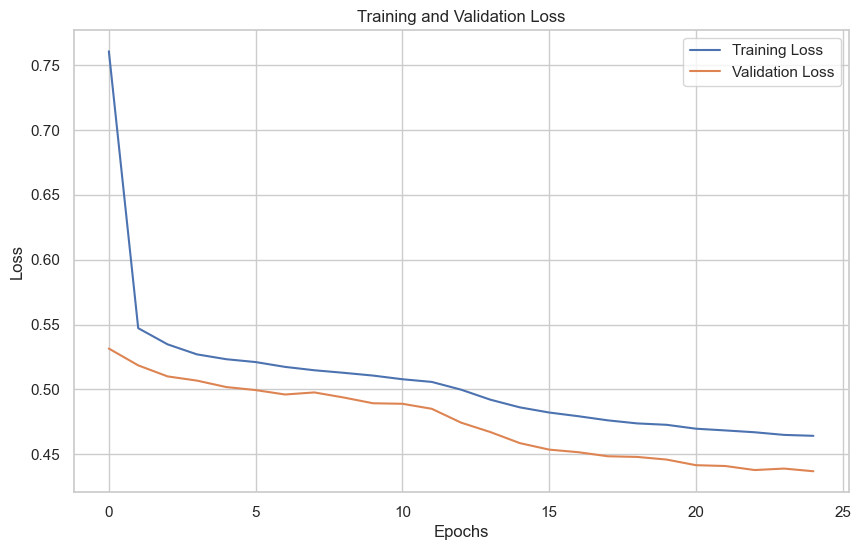

In [76]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [77]:
# Get the predicted probabilities for each class
y_pred_prob = modelLSTM.predict(X_test)

# Get the predicted classes by selecting the class with the highest probability
y_pred_classes = y_pred_prob.argmax(axis=-1)

# Display predicted classes for X_test
print(y_pred_classes)


1347/1347 [==============================] - 5s 3ms/step
[44 61 53 ... 42 58 61]


In [78]:
# Create a list of tuples with (key, value) pairs from the dictionary
datamap = [(key, crime_dict[key]) for key in y_pred_classes]

# Create a DataFrame from the list of tuples
datamap = pd.DataFrame(datamap, columns=['CrimeCode', 'Description'])

# Display the DataFrame
datamap.head()

CrimeCode        Description
0         44           BURGLARY
1         61         AUTO THEFT
2         53  LARCENY FROM AUTO
3         56            LARCENY
4         56            LARCENY